In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [2]:


data = pd.read_csv("./archive/books.csv", on_bad_lines='skip')


In [3]:
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [4]:
data.shape

(11123, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


No hay nulos.... Agradecido con el niño jesus 

### Descripción de las columnas:

- **bookID**: Contiene el ID único para cada libro/serie.
- **title**: Contiene los títulos de los libros.
- **authors**: Contiene el autor del libro en particular.
- **average_rating**: El promedio de calificación de los libros, decidido por los usuarios.
- **ISBN**: Número ISBN(10), proporciona información sobre un libro, como la edición y el editor.
- **ISBN 13**: El nuevo formato para ISBN, implementado en 2007. 13 dígitos.
- **language_code**: Indica el idioma de los libros.
- **Num_pages**: Contiene el número de páginas del libro.
- **Ratings_count**: Contiene el número de calificaciones dadas para el libro.
- **text_reviews_count**: Tiene el conteo de reseñas dejadas por los usuarios.

In [6]:
n_titulos = data['title'].nunique()
n_autores = data['authors'].nunique()
n_editoriales = data['publisher'].nunique()
n_idiomas = data['language_code'].nunique()
print('Títulos únicos:', n_titulos)
print('Número de autores en el conjunto de datos:', n_autores)
print('Número de editoriales en el conjunto de datos:', n_editoriales)
print('Número de idiomas en el conjunto de datos:', n_idiomas)

Títulos únicos: 10348
Número de autores en el conjunto de datos: 6639
Número de editoriales en el conjunto de datos: 2290
Número de idiomas en el conjunto de datos: 27


NO APARECE MI AUTOR FAVORITO EN ESTE DATA FRAME

Leanse mistborn

![Texto alternativo](Fotos/mistborn.jpg)

In [7]:

resultados_busqueda = data[data['authors'] == 'Brandon Sanderson']
print(resultados_busqueda)

Empty DataFrame
Columns: [bookID, title, authors, average_rating, isbn, isbn13, language_code,   num_pages, ratings_count, text_reviews_count, publication_date, publisher]
Index: []


In [8]:
data.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


Podemos ver que las puntuaciones varian entre 0 y 5

Vamos a calculas una media bayesiana de los ratings segun autor

In [9]:

# Calcular estadísticas de autores
estadisticas_autor = data.groupby('authors')['average_rating'].agg(['count','mean'])

# Mostrar los primeros resultados
estadisticas_autor.head()

,count,mean
authors,,
A.B. Yehoshua/Hillel Halkin,2,3.60
A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky,1,3.76
A.E. Cunningham/Harlan Ellison/Charles F. Miller/Terry Dowling/Paul Rhoads/Jack Vance/Tom Shippey/Gene Wolfe/David Langford/Dan Simmons/David Mathew,1,4.15
A.J. Jacobs,1,3.76
A.M. Homes,1,3.28


In [10]:
C = estadisticas_autor['count'].mean()
m = estadisticas_autor['mean'].mean()

print('Promedio de libros para un autor dado:', C)
print('Calificación promedio de un libro para un autor dado:', m)

def calificacion_bayesiana(calificaciones):
    promedio_bayesiano = (C * m + calificaciones.sum()) / (C + calificaciones.count())
    return round(promedio_bayesiano, 3)


Promedio de libros para un autor dado: 1.6754029221268263
Calificación promedio de un libro para un autor dado: 3.9291907898469214


In [11]:
keith_donohue = pd.Series([5.0,5.0])
calificacion_bayesiana(keith_donohue) 

4.512

Parece funcionar bien, vamos a probar hacer un "ranking" con esto 

In [12]:
calificaciones_libros_bayesianas = data.groupby('authors')['average_rating'].agg(calificacion_bayesiana).reset_index()


In [13]:
calificaciones_libros_bayesianas.sort_values(by='average_rating',ascending=False).iloc[0:10]

,authors,average_rating
628,Bill Watterson,4.558
2453,Hiromu Arakawa/Akira Watanabe,4.488
2455,Hiromu Arakawa/荒川弘/方郁仁,4.448
2622,J.K. Rowling,4.436
2626,J.K. Rowling/Mary GrandPré,4.413
2452,Hiromu Arakawa,4.393
5192,Richard P. Feynman/Robert B. Leighton/Matthew ...,4.370
2340,Hayao Miyazaki/Matt Thorn/Kaori Inoue/Joe Yama...,4.368
1050,Cook's Illustrated Magazine,4.357
2640,J.R.R. Tolkien,4.354


Parecen gustar los autores Japoneses. Sobre ese tema tengo para recomendar: Kafka a la orilla del mar de Murakami 
![Texto alternativo](Fotos/kafka.jpg)

Vamos a mirar el top 10 de libros en este data set, para evitar libros con pocas reviews pongo un rating count arbitrario

In [14]:
top_ten = data[data['ratings_count'] > 1000000]
top_ten.sort_values(by='average_rating', ascending=False).head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4415,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,0439064864,9780439064866,eng,341,2293963,34692,6/2/1999,Arthur A. Levine Books / Scholastic Inc.
5270,19063,The Book Thief,Markus Zusak/Cao Xuân Việt Khương,4.37,0375831002,9780375831003,eng,552,1516367,86881,3/14/2006,Alfred A. Knopf
23,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,0618346252,9780618346257,eng,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt
1697,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,0618260307,9780618260300,eng,366,2530894,32871,8/15/2002,Houghton Mifflin
7309,28187,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,4.25,0786838655,9780786838653,eng,375,1766725,47951,3/1/2006,Disney Hyperion Books
6422,24178,Charlotte's Web,E.B. White/Garth Williams/Rosemary Wells,4.17,0064410935,9780064410939,eng,184,1300470,14739,10/1/2001,HarperCollinsPublishers
1069,3636,The Giver (The Giver #1),Lois Lowry,4.13,0385732554,9780385732550,eng,208,1585589,56604,1/24/2006,Ember


C:\Users\kaled\AppData\Local\Temp\ipykernel_16572\196234564.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="average_rating", y="title", data=libros_populares, palette='inferno')
c:\Users\kaled\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\kaled\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_

<Axes: xlabel='average_rating', ylabel='title'>

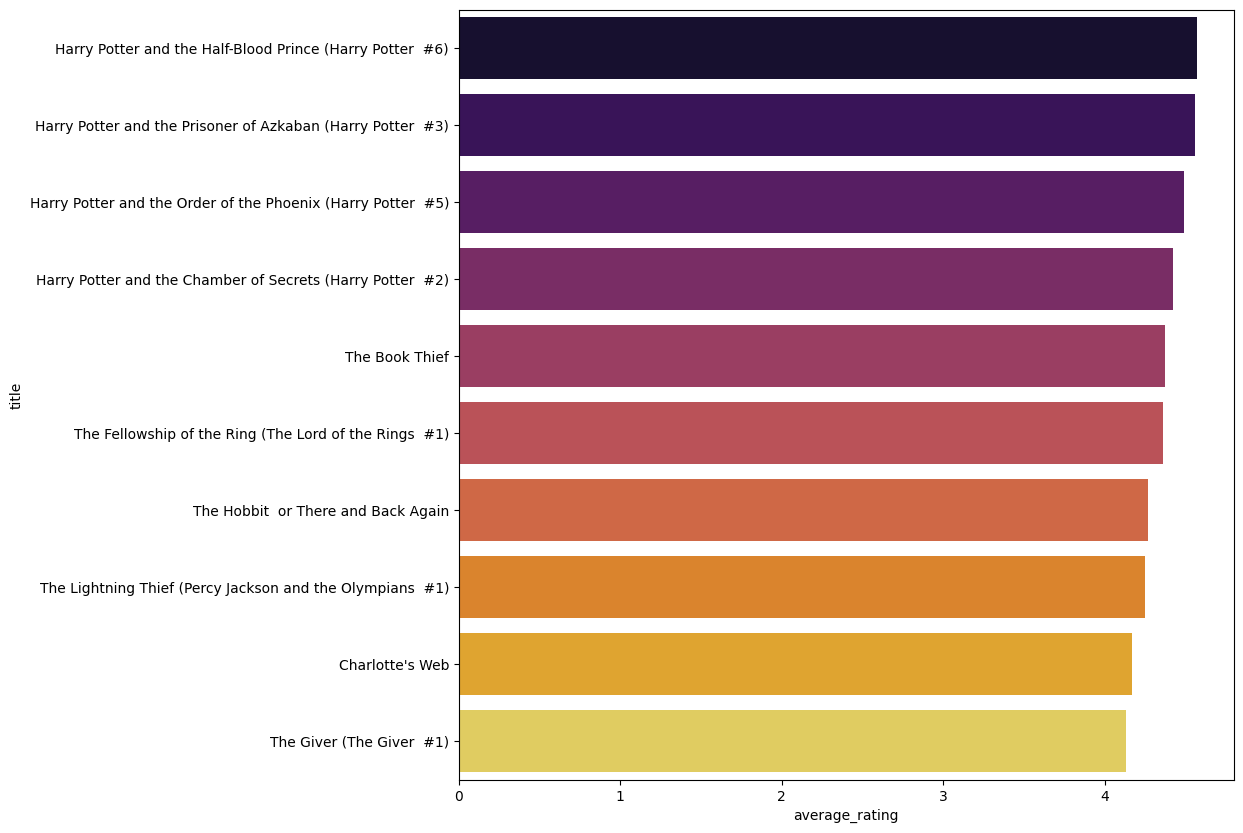

In [15]:

plt.figure(figsize=(10, 10))
libros_populares = top_ten.sort_values(by='average_rating', ascending=False).head(10)
sns.barplot(x="average_rating", y="title", data=libros_populares, palette='inferno')

Se ve que a la gente le gusta Harry Potter

Miremos tambien quienes son los autores con mas libros publicados

In [16]:
autores = data['authors'].value_counts()
autores_mas = pd.DataFrame(autores.sort_values(ascending=False).iloc[0:10]).reset_index()   


In [17]:
autores_mas.head()

,authors,count
0,Stephen King,40
1,P.G. Wodehouse,40
2,Rumiko Takahashi,39
3,Orson Scott Card,35
4,Agatha Christie,33


c:\Users\kaled\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\kaled\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\kaled\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

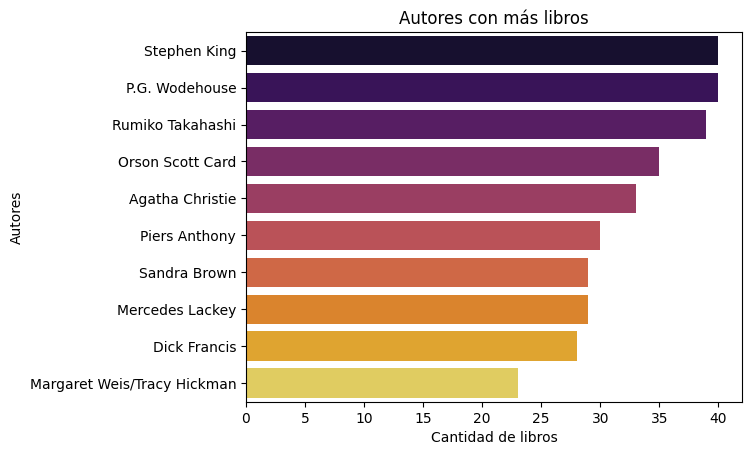

In [18]:
sns.barplot(data=autores_mas, x='count', y='authors', hue='authors', palette='inferno')
plt.title('Autores con más libros')
plt.xlabel('Cantidad de libros')
plt.ylabel('Autores')
plt.show()

Text(0.5, 0, 'Puntajes promedios')

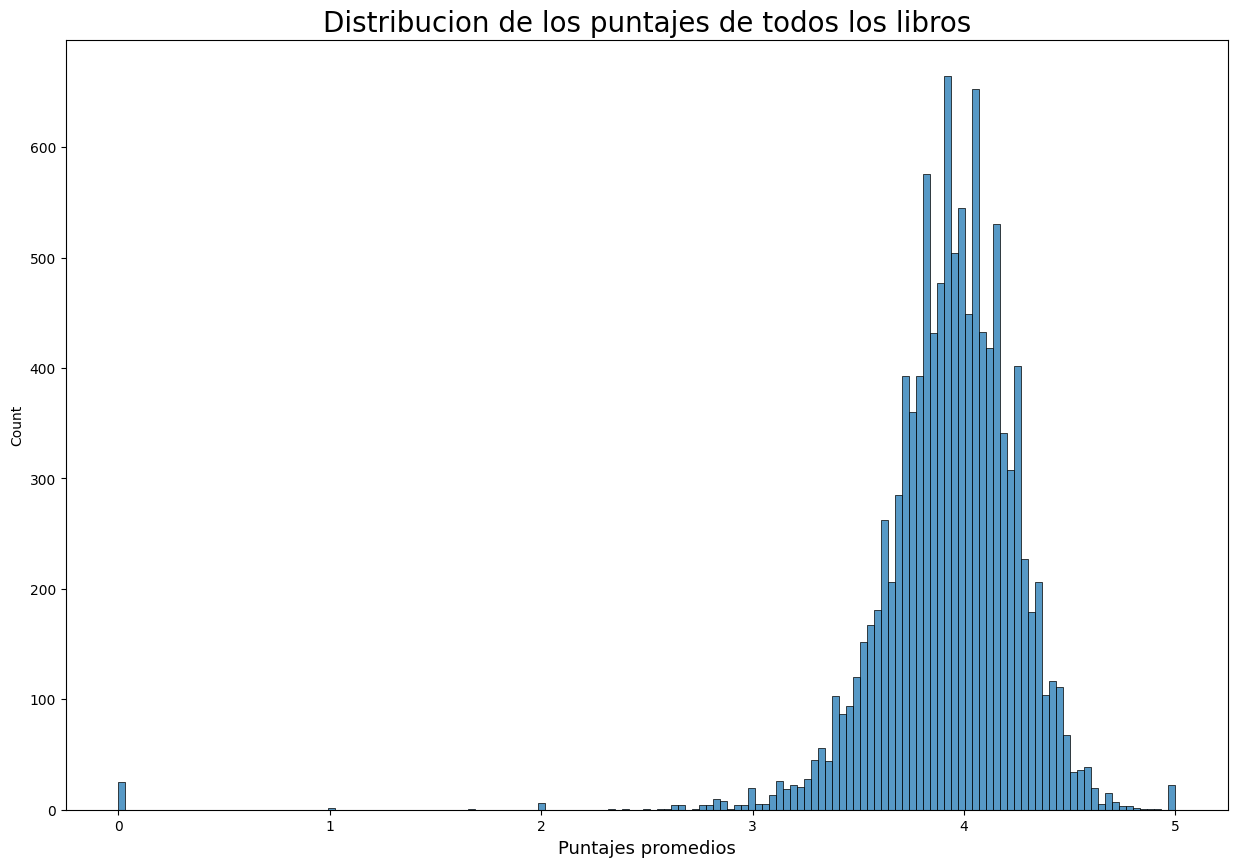

In [19]:
data.average_rating = data.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[15,10])
sns.histplot(data['average_rating'],ax=ax)
ax.set_title('Distribucion de los puntajes de todos los libros',fontsize=20)
ax.set_xlabel('Puntajes promedios',fontsize=13)

Me parecio interesante mirar un poco como estan distribuidos los puntajes promedios de los libros

Ahora vamos a buscar relaciones bivariantes a ver cual tiene buena pinta para usar 

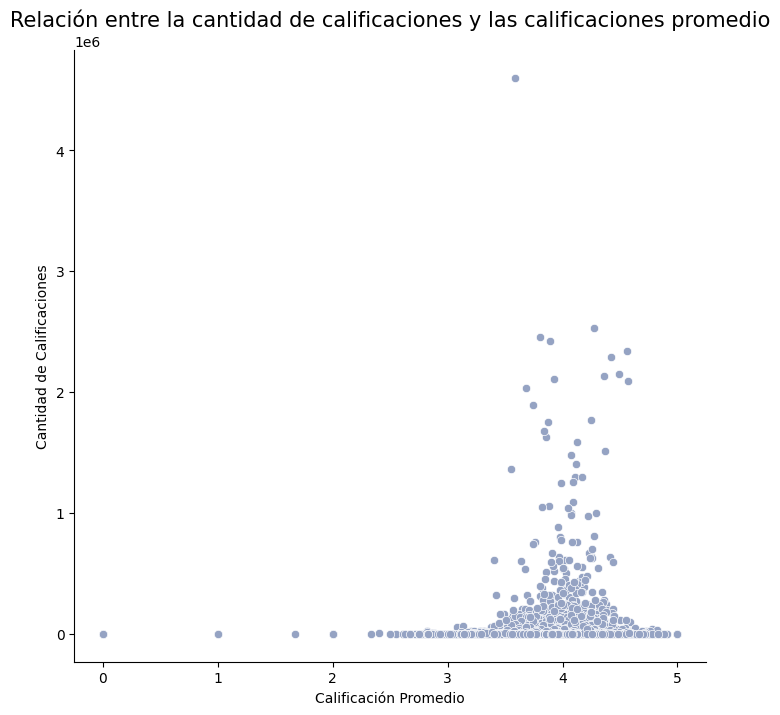

In [22]:
ax = sns.relplot(data=data, x="average_rating", y="ratings_count", color='#95a3c3', sizes=(100, 200), height=7, marker='o')
plt.title("Relación entre la cantidad de calificaciones y las calificaciones promedio", fontsize=15)
ax.set_axis_labels("Calificación Promedio", "Cantidad de Calificaciones")

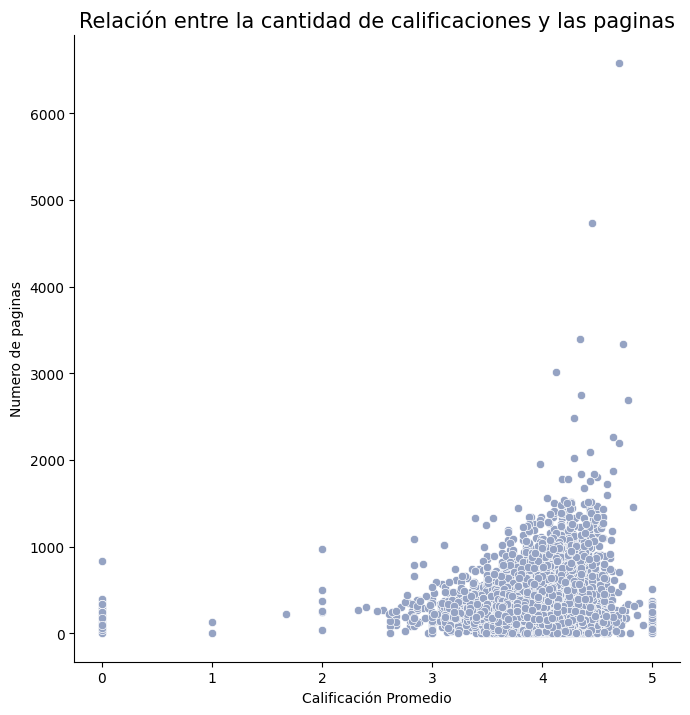

In [23]:
ax = sns.relplot(data=data, x="average_rating", y="  num_pages", color = '#95a3c3', sizes=(100, 200), height=7, marker='o')
plt.title("Relación entre la cantidad de calificaciones y las paginas", fontsize=15)
ax.set_axis_labels("Calificación Promedio", "Numero de paginas")

<Figure size 1500x1000 with 0 Axes>

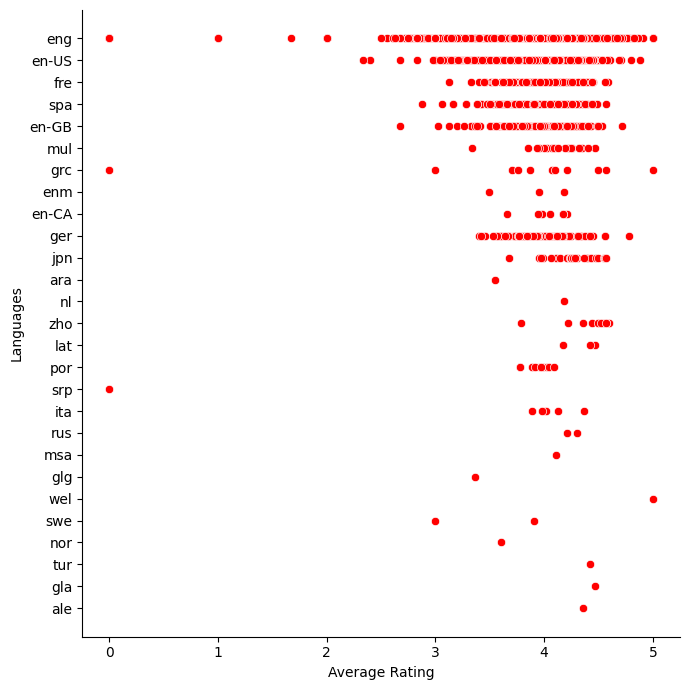

In [26]:
plt.figure(figsize=(15,10))
ax = sns.relplot(x="average_rating", y="language_code", data = data, color = 'red',sizes=(100, 200), height=7, marker='o')
ax.set_axis_labels("Calificación Promedio", "idiomas")  

<Figure size 1500x1000 with 0 Axes>

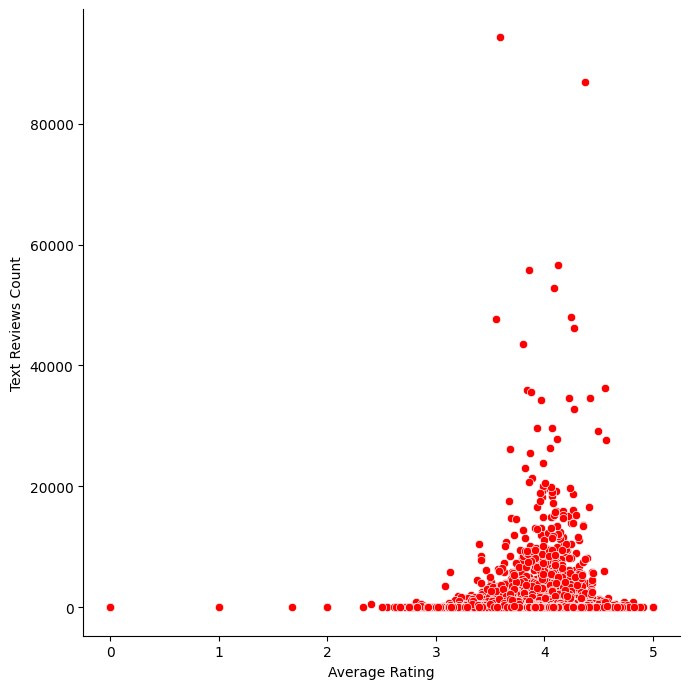

In [28]:
plt.figure(figsize=(15,10))
ax = sns.relplot(x="average_rating", y="text_reviews_count", data = data, color = 'red',sizes=(100, 200), height=7, marker='o')
ax.set_axis_labels("Average Rating", "Text Reviews Count")

Ahora vamos a hacer columnas nuevas para agregar informacion que considero util 

In [29]:
df = data.copy()

In [30]:
df.loc[ (df['average_rating'] >= 0) & (df['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
df.loc[ (df['average_rating'] > 1) & (df['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
df.loc[ (df['average_rating'] > 2) & (df['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
df.loc[ (df['average_rating'] > 3) & (df['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
df.loc[ (df['average_rating'] > 4) & (df['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

In [32]:
rating_df = pd.get_dummies(df['rating_between'])
rating_df.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,False,False,True
4,False,False,False,False,True


In [33]:
language_df = pd.get_dummies(df['language_code'])
language_df.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
features = pd.concat([rating_df, language_df, df['average_rating'], df['ratings_count']], axis=1)
features.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,...,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.57,2095690
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.49,2153167
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.42,6333
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.56,2339585
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.78,41428


In [36]:
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [37]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

In [58]:
def RecomendadorLibros(nombre_libro):
    lista_libros_recomendados = []
    indice_libro = df[df['title'] == nombre_libro].index
    indice_libro = indice_libro[0]
    for nuevo_id in idlist[indice_libro]:
        lista_libros_recomendados.append(df.loc[nuevo_id].title)
    
    print('Porque leíste:', nombre_libro)
    print()
    for titulo in lista_libros_recomendados:
        if titulo != nombre_libro:  # Excluye el nombre del libro de entrada
            print(titulo)
            print()  # Agrega un espacio entre los títulos recomendados


In [59]:
RecomendadorLibros('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')


Porque leíste: Harry Potter and the Half-Blood Prince (Harry Potter  #6)

Harry Potter and the Order of the Phoenix (Harry Potter  #5)

The Fellowship of the Ring (The Lord of the Rings  #1)

Harry Potter and the Chamber of Secrets (Harry Potter  #2)

Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)

The Lightning Thief (Percy Jackson and the Olympians  #1)



In [52]:
RecomendadorLibros('The Lord of the Rings: Weapons and Warfare')

Porque leíste: The Lord of the Rings: Weapons and Warfare

The Lord of the Rings: Weapons and Warfare

Fullmetal Alchemist  Vol. 2 (Fullmetal Alchemist  #2)

Carrie / 'Salem's Lot / The Shining

The Valley of Vision: A Collection of Puritan Prayers and Devotions

The Gettysburg Address

The Return of the King (The Lord of the Rings  #3)



In [54]:
RecomendadorLibros('The Da Vinci Code (Robert Langdon  #2)')

Porque leíste: The Da Vinci Code (Robert Langdon  #2)

The Da Vinci Code (Robert Langdon  #2)

The Alchemist

Of Mice and Men

Romeo and Juliet

Lord of the Flies

Eat  Pray  Love



In [55]:
RecomendadorLibros('Monster')


Porque leíste: Monster

Monster

Plum Lovin' (Stephanie Plum  #12.5)

On Beauty

The Yiddish Policemen's Union

Sex  Drugs  and Cocoa Puffs: A Low Culture Manifesto

The Face on the Milk Carton (Janie Johnson  #1)



In [62]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test = train_test_split(features, test_size=0.2, random_state=42)

# Crear y ajustar el modelo KMeans al conjunto de entrenamiento
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train)

# Predecir los grupos para los datos de prueba
predictions = kmeans.predict(X_test)

# Evaluar el rendimiento del modelo KMeans
print('Silhouette Score:', silhouette_score(X_test, predictions))
print('Calinski Harabasz Score:', calinski_harabasz_score(X_test, predictions))


Silhouette Score: 0.8729525823586441
Calinski Harabasz Score: 3865.0141188345283


### Silhouette Score
El Silhouette Score mide la cohesión y separación de los clusters. Para cada muestra, calcula la distancia media entre esa muestra y todas las demás muestras en el mismo cluster (a), y luego calcula la distancia media entre esa muestra y todas las muestras en el cluster más cercano diferente (b). El coeficiente silhouette se calcula como (b - a) / max(a, b). El valor del coeficiente silhouette varía entre -1 y 1, donde un valor más cercano a 1 indica que la muestra está bien clasificada, mientras que un valor cercano a -1 indica que la muestra podría haberse clasificado en el cluster incorrecto.

### Calinski Harabasz Score
El Calinski Harabasz Score, también conocido como índice de varianza entre grupos (Variance Ratio Criterion), mide la relación entre la dispersión intra-cluster y la dispersión inter-cluster. Cuanto mayor sea el valor del índice, mejor será la calidad de los clusters. Este índice es el cociente de la dispersión entre clusters y la dispersión dentro de los clusters, y se calcula como el cociente de la dispersión total de los clusters y la dispersión total dentro de los clusters.

En resumen, ambos scores proporcionan una medida de cuán bien están separados los clusters y cuán cohesivos son los puntos dentro de los clusters. Un puntaje más alto en cualquiera de estas métricas indica una mejor calidad de los clusters.


- Un Silhouette Score cercano a 1 indica que los clusters están bien definidos y separados.
- Un Calinski Harabasz Score alto indica que los clusters son compactos y bien separados entre sí.